In [1]:
import ehrapy as ep
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

adata = ep.io.read_h5ad("../../anndata_objects/adata_02_2023_pneumonia_unspecified_rest.h5ad")

Installed version 0.2.0 of ehrapy is outdated. Newest version is 0.3.0!

# Part A

In [15]:
import ehrapy as ep
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
ep.settings.n_jobs=-1

df_a = pd.read_csv("../../data_pp_notebooks/temp_pp_data_files/data_02_2023_NEW.csv")
# should remove this earlier
df_a.drop(["language", "religion", "marital_status"], inplace=True, axis=1)
# shift negative values for log_norm -> see #402 in ehrapy, do this after anndata creation!
for neg_col in ["Base Excess_min", "Base Excess_max", "Base Excess_avg", "Excrement_avg", "Excrement_min", "Excrement_max"]:
    abs_min = abs(df_a[neg_col].min())
    df_a[neg_col] = df_a[neg_col] + abs_min

obs_only = list(df_a.columns[215:415])
obs_only.extend(["disease_type_1","disease_type_2","disease_name_1", 
                 "disease_name_2","INTIME", "OUTTIME", 
                 "SUBJECT_ID", "HADM_ID", "ICUSTAY_ID", 
                 "FIRST_CAREUNIT", "LAST_CAREUNIT", "age_in_month"])

adata = ep.ad.df_to_anndata(df_a, columns_obs_only=obs_only)


Quality control metrics missing. Calculating...

TypeError! Setting quality control metrics to nan. Did you encode your data?

Feature Diastolic Pressure_max had more than 30.815579944049926% missing values!

Feature Procalcitonin_avg had more than 50.22595222724339% missing values!

Feature Excrement_min had more than 38.35449393874184% missing values!

Feature Systolic Pressure_min had more than 30.815579944049926% missing values!

Feature Systolic Pressure_max had more than 30.815579944049926% missing values!

Feature Procalcitonin_max had more than 50.22595222724339% missing values!

Feature Procalcitonin_min had more than 50.22595222724339% missing values!

Feature Systolic Pressure_avg had more than 30.815579944049926% missing values!

Feature Diastolic Pressure_avg had more than 30.815579944049926% missing values!

Feature Excrement_avg had more than 38.35449393874184% missing values!

Feature Excrement_max had more than 38.35449393874184% missing values!

Feature Diastolic Pressure_min had more than 30.815579944049926% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

Output()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


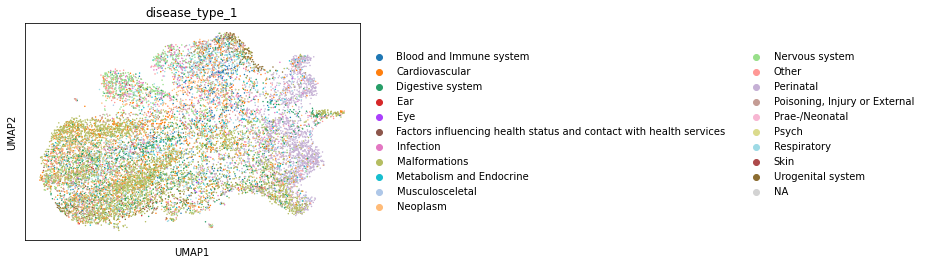

In [16]:
ep.pp.knn_impute(adata, n_neighbours=20)
adata_enc = ep.pp.encode(adata, autodetect=True, encodings="one_hot_encoding")
adata_enc.layers["original_imputed"] = adata_enc.X.copy()
ep.pp.log_norm(adata_enc)
ep.pp.neighbors(adata_enc)
ep.tl.umap(adata_enc)
ep.pl.umap(adata_enc, color="disease_type_1", save="fig2_disease_type")

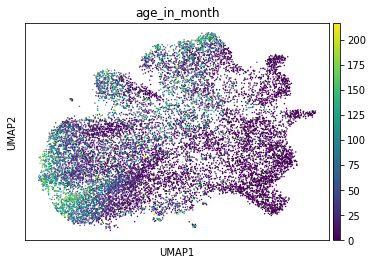

In [17]:
ep.pl.umap(adata_enc, color="age_in_month", save="fig2_age_in_month")

# Part B

Quality control metrics missing. Calculating...

TypeError! Setting quality control metrics to nan. Did you encode your data?

Feature Systolic Pressure_max had more than 42.78996865203762% missing values!

Feature Respiratory Rate_max had more than 35.26645768025078% missing values!

Feature Excrement_avg had more than 48.589341692789965% missing values!

Feature Excrement_max had more than 48.589341692789965% missing values!

Feature Temperature_max had more than 34.71786833855799% missing values!

Feature Temperature_avg had more than 34.71786833855799% missing values!

Feature Procalcitonin_avg had more than 42.16300940438871% missing values!

Feature Procalcitonin_max had more than 42.16300940438871% missing values!

Feature Heart Rate_max had more than 35.893416927899686% missing values!

Feature Diastolic Pressure_min had more than 42.78996865203762% missing values!

Feature Excrement_min had more than 48.589341692789965% missing values!

Feature Systolic Pressure_min had more than 42.78996865203762% missing values!

Feature Heart Rate_avg had more than 35.893416927899686% missing values!

Feature Procalcitonin_min had more than 42.16300940438871% missing values!

Feature Respiratory Rate_avg had more than 35.26645768025078% missing values!

Feature Systolic Pressure_avg had more than 42.78996865203762% missing values!

Feature Heart Rate_min had more than 35.893416927899686% missing values!

Feature Diastolic Pressure_max had more than 42.78996865203762% missing values!

Feature Respiratory Rate_min had more than 35.26645768025078% missing values!

Feature Diastolic Pressure_avg had more than 42.78996865203762% missing values!

Feature Temperature_min had more than 34.71786833855799% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

Output()

Output()

         Falling back to preprocessing with `sc.pp.pca` and default params.


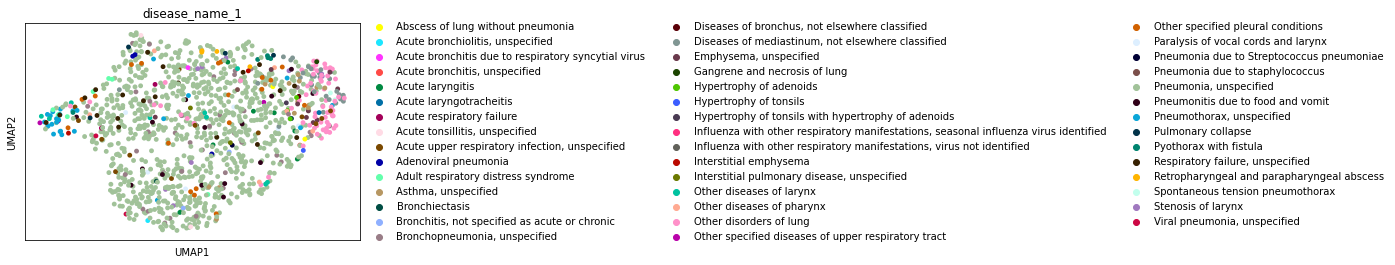

In [20]:
df_b = df_a
df_b = df_b.loc[df_a.disease_type_1 == "Respiratory"]
obs_only = list(df_b.columns[215:415])
obs_only.extend(["disease_type_1","disease_type_2","disease_name_1", 
                 "disease_name_2","INTIME", "OUTTIME", 
                 "SUBJECT_ID", "HADM_ID", "ICUSTAY_ID", 
                 "FIRST_CAREUNIT", "LAST_CAREUNIT", "age_in_month"])

adata = ep.ad.df_to_anndata(df_b, columns_obs_only=obs_only)
ep.pp.knn_impute(adata, n_neighbours=20)
adata_enc = ep.pp.encode(adata, autodetect=True, encodings="one_hot_encoding")
adata_enc.layers["original_imputed"] = adata_enc.X.copy()
ep.pp.log_norm(adata_enc)
ep.pp.neighbors(adata_enc)
ep.tl.umap(adata_enc)
ep.pl.umap(adata_enc, color="disease_name_1",save="fig2_disease_name")

# Part C

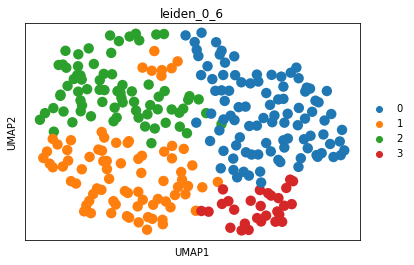

In [2]:
adata = ep.io.read_h5ad("../../anndata_objects/adata_02_2023_pneumonia_unspecified_rest.h5ad")
ep.tl.leiden(adata, resolution=0.6, key_added="leiden_0_6")
ep.pl.umap(adata, color=["leiden_0_6"])

In [3]:
pneumonia_vars = ["Neutrophils_max", "Neutrophils_avg", "Absolute Lymphocyte Count_max", "Absolute Lymphocyte Count_min", "Absolute Lymphocyte Count_avg",
                 "LOS", "Monocytes_max","Monocytes_avg","ehrapycat_sputum_positive_bacteria_1.0", "ehrapycat_sputum_positive_fungi_1.0","ehrapycat_Death_1", "Procalcitonin_max", "C-Reactive Protein_max"]
pneumonia_adata_subset = adata[:, pneumonia_vars]
ep.tl.rank_features_groups(pneumonia_adata_subset, groupby="leiden_0_6", layer="original_imputed")
pneumonia_adata_subset.obs["Death"] = pneumonia_adata_subset.obs["Death"].astype("category")

Trying to set attribute `._uns` of view, copying.


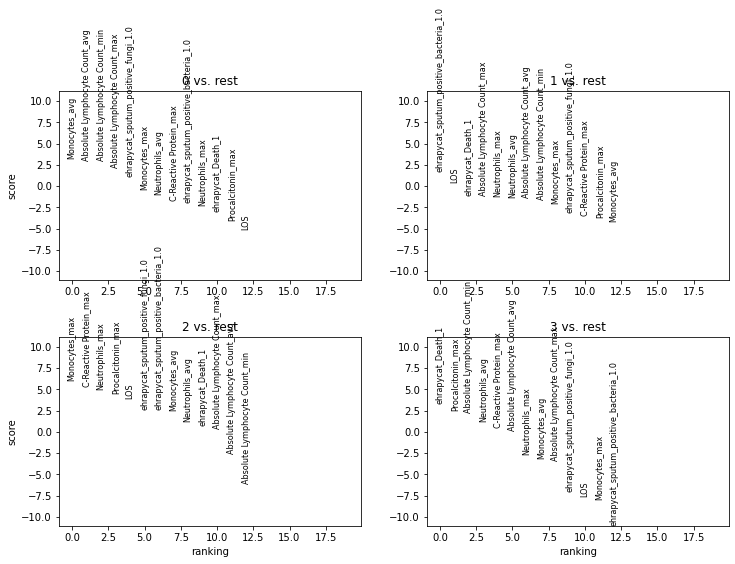

In [4]:
ep.pl.rank_features_groups(pneumonia_adata_subset,key="rank_features_groups", ncols=2)

In [5]:
liver_vars = ["Cholinesterase_min", "Gamma Glutamyltransferase_max", "Gamma Glutamyltransferase_avg",
               "Alanine Aminotransferase (ALT)_max", "Alanine Aminotransferase (ALT)_avg",
                "Prealbumin_min", "Prealbumin_max", "Albumin_min", "Albumin_max",
                "Asparate Aminotransferase (AST)_max", "Asparate Aminotransferase (AST)_avg", "Bilirubin, Total_max"]
liver_adata_subset = adata[:, liver_vars]
ep.tl.rank_features_groups(liver_adata_subset, groupby="leiden_0_6", layer="original_imputed")

Trying to set attribute `._uns` of view, copying.
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.

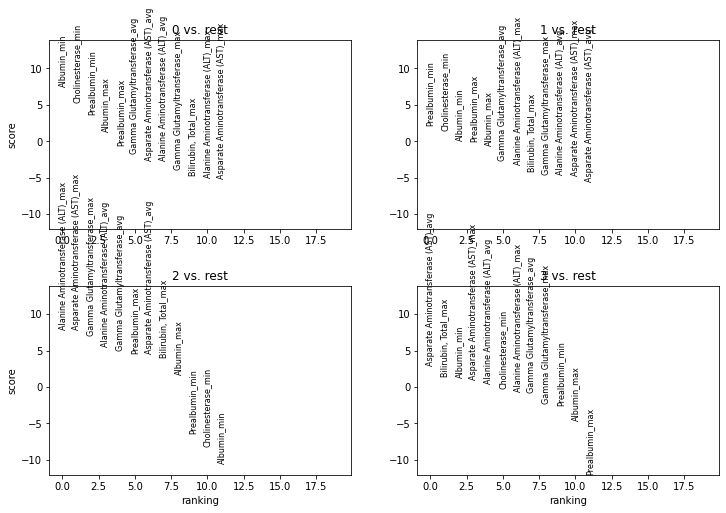

In [6]:
ep.pl.rank_features_groups(liver_adata_subset,key="rank_features_groups", ncols=2)

In [7]:
chlinical_chemie = ["Creatinine_max", "Platelet Count_min", "Lactate_max", "Calcium, Total_max", "Calcium, Total_min", "Potassium_max", "Potassium_min",
            "pH_min", "pH_max", "Sodium, Whole Blood_min", "Sodium, Whole Blood_max", "Chloride, Whole Blood_min", "Chloride, Whole Blood_max"]
cc_adata_subset = adata[:, chlinical_chemie]
ep.tl.rank_features_groups(cc_adata_subset, groupby="leiden_0_6", layer="original_imputed")

Trying to set attribute `._uns` of view, copying.


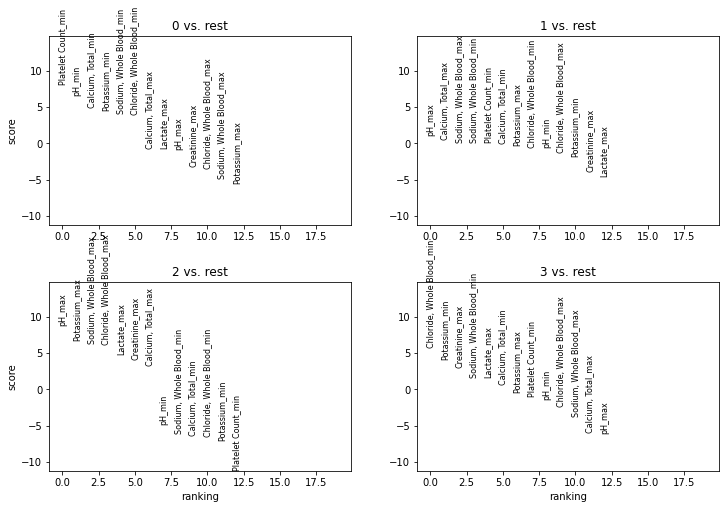

In [8]:
ep.pl.rank_features_groups(cc_adata_subset,key="rank_features_groups", ncols=2)

In [9]:
drugs_vars = [drug_column for drug_column in adata.var_names if "received" in drug_column and "1.0" in drug_column] # no duplicated encodes needed
drug_adata_subset = adata[:, drugs_vars]
ep.tl.rank_features_groups(drug_adata_subset, groupby="leiden_0_6", layer="original_imputed")

Trying to set attribute `._uns` of view, copying.


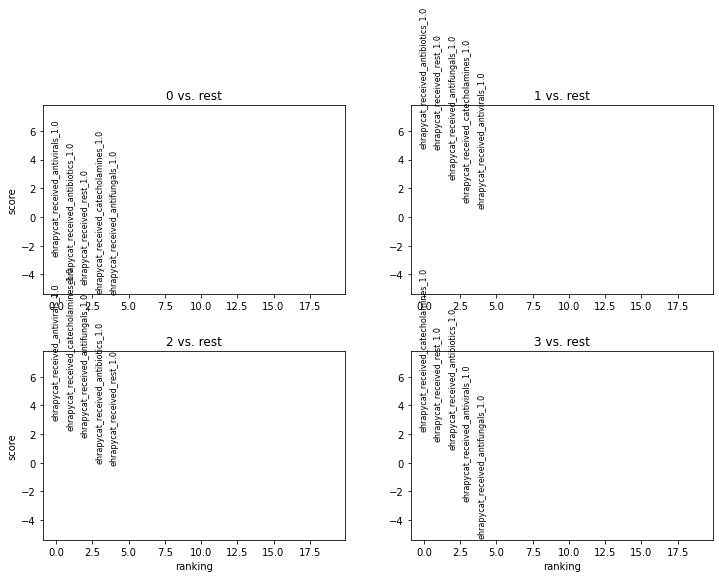

In [10]:
ep.pl.rank_features_groups(drug_adata_subset,key="rank_features_groups", ncols=2)

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Pneumonia unspecified - annotated' as categorical


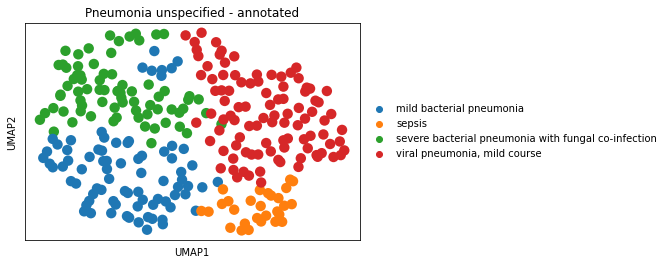

In [11]:
annotation = {
    "2": "severe bacterial pneumonia with fungal co-infection",
    "0": "viral pneumonia, mild course",   
    "3": "sepsis",
    "1": "mild bacterial pneumonia" 
}



pneumonia_adata_subset.obs["Pneumonia unspecified - annotated"] = [
    annotation[l] if l in annotation.keys() else l for l in pneumonia_adata_subset.obs["leiden_0_6"]
]

ep.pl.umap(pneumonia_adata_subset, color="Pneumonia unspecified - annotated", save="fig2_anot_pneumonia.png")

In [12]:
pneumonia_adata_subset.uns["rank_genes_groups"] = pneumonia_adata_subset.uns.pop("rank_features_groups")
pneumonia_df_0 = sc.get.rank_genes_groups_df(pneumonia_adata_subset, group="0")
pneumonia_df_1 = sc.get.rank_genes_groups_df(pneumonia_adata_subset, group="1")
pneumonia_df_2 = sc.get.rank_genes_groups_df(pneumonia_adata_subset, group="2")
pneumonia_df_3 = sc.get.rank_genes_groups_df(pneumonia_adata_subset, group="3")

In [13]:
drug_adata_subset.uns["rank_genes_groups"] = drug_adata_subset.uns.pop("rank_features_groups")
drug_df_0 = sc.get.rank_genes_groups_df(drug_adata_subset, group="0")
drug_df_1 = sc.get.rank_genes_groups_df(drug_adata_subset, group="1")
drug_df_2 = sc.get.rank_genes_groups_df(drug_adata_subset, group="2")
drug_df_3 = sc.get.rank_genes_groups_df(drug_adata_subset, group="3")

In [14]:
cc_adata_subset.uns["rank_genes_groups"] = cc_adata_subset.uns.pop("rank_features_groups")
cc_df_0 = sc.get.rank_genes_groups_df(cc_adata_subset, group="0")
cc_df_1 = sc.get.rank_genes_groups_df(cc_adata_subset, group="1")
cc_df_2 = sc.get.rank_genes_groups_df(cc_adata_subset, group="2")
cc_df_3 = sc.get.rank_genes_groups_df(cc_adata_subset, group="3")

In [15]:
liver_adata_subset.uns["rank_genes_groups"] = liver_adata_subset.uns.pop("rank_features_groups")
liver_df_0 = sc.get.rank_genes_groups_df(liver_adata_subset, group="0")
liver_df_1 = sc.get.rank_genes_groups_df(liver_adata_subset, group="1")
liver_df_2 = sc.get.rank_genes_groups_df(liver_adata_subset, group="2")
liver_df_3 = sc.get.rank_genes_groups_df(liver_adata_subset, group="3")

In [16]:
hm_features = ["ehrapycat_Death_1", "LOS", "ehrapycat_sputum_positive_bacteria_1.0","ehrapycat_sputum_positive_fungi_1.0",
               "Absolute Lymphocyte Count_max", "Neutrophils_max", 
               "Procalcitonin_max", "C-Reactive Protein_max", "Alanine Aminotransferase (ALT)_avg", 
               "Asparate Aminotransferase (AST)_max", "Gamma Glutamyltransferase_max", "Platelet Count_min"]

In [17]:
pneumonia_dfs = [pneumonia_df_0, pneumonia_df_1, pneumonia_df_2, pneumonia_df_3]
liver_dfs = [liver_df_0, liver_df_1, liver_df_2, liver_df_3]
cc_dfs = [cc_df_0, cc_df_1, cc_df_2, cc_df_3]

In [18]:
temp_ls = []
for pneu_feat in hm_features[:8]:
    for df in pneumonia_dfs:
        row = df.loc[df.names == pneu_feat].iloc[0].to_list()
        temp_ls.append(row)

for liver_feat in hm_features[8:11]:
    for df in liver_dfs:
        row = df.loc[df.names == liver_feat].iloc[0].to_list()
        temp_ls.append(row)

for cc_feat in hm_features[11:]:
    for df in cc_dfs:
        row = df.loc[df.names == cc_feat].iloc[0].to_list()
        temp_ls.append(row)

In [19]:
temp_df = pd.DataFrame(temp_ls, columns=["name", "score", "logfoldchange", "pval", "pval_adj"])
temp_df.drop(["logfoldchange", "pval", "pval_adj", "name"], axis=1, inplace=True)

In [20]:
result = pd.DataFrame(temp_df.values.reshape(-1,4)).T
result.columns = ["death", "length of stay", "sputum_pos_bacteria", "sputum_pos_fungi", "lymphocytes", "neutrophils", "PCT", "CRP", "ALT", "AST", "GGT", "platelets count"]

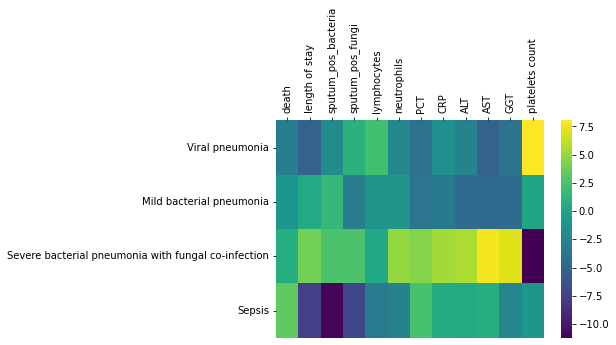

In [25]:
ax = sns.heatmap(result, cmap="viridis")
ax.set(xlabel="", ylabel="")
ax.set_yticklabels(["Viral pneumonia","Mild bacterial pneumonia", "Severe bacterial pneumonia with fungal co-infection", "Sepsis"])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)
ax.xaxis.tick_top()
plt.savefig("./fig_2feature_heatmap.png") 

# Part D

In [2]:
preprocessed_df = pd.read_csv("../per_day.csv")
# should remove this earlier
preprocessed_df.drop(["language", "religion", "marital_status"], inplace=True, axis=1)
# focus on infants
preprocessed_df = preprocessed_df.loc[(preprocessed_df.age_in_month > 13) & (preprocessed_df.disease_name_1 == "Pneumonia, unspecified")]
# shift negative values for log_norm -> see #402 in ehrapy, do this after anndata creation!
for neg_col in ["Base Excess_min", "Base Excess_max", "Base Excess_avg", "Excrement_avg", "Excrement_min", "Excrement_max"]:
    abs_min = abs(preprocessed_df[neg_col].min())
    preprocessed_df[neg_col] = preprocessed_df[neg_col] + abs_min

/tmp/ipykernel_960/1474524289.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  preprocessed_df = pd.read_csv("../per_day.csv")
/tmp/ipykernel_960/1474524289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df[neg_col] = preprocessed_df[neg_col] + abs_min


In [3]:
cand_patient = preprocessed_df.loc[preprocessed_df.HADM_ID == 102315]
cand_patient = cand_patient.reset_index()
cand_patient = cand_patient.rename(columns={"index":"day"})
cand_patient['day'] = cand_patient.index

In [4]:
cortison_like = ['Beclomethasone dipropionate inhalation suspension', 'Dexamethasone Sodium Phosphate Injection',
                'Methylprednisolone Sodium Succinate for Injection','Dexamethasone Acetate Tablets', 'Prednisone Acetate Tablets']

anastehtics = ['Phenobarbital Sodium for Injection', 'Lidocaine Hydrochloride Injection','Ibuprofen Suspension',
              'Propofol Injectable Emulsion','Phenobarbital Tablets','Vecuronium Bromide for Injection', 'Indometacin Enteric-coated Tablets']

respiratory_drugs = ['Salbutamol Sulfate Nebules Inhalation Solution', 'Ambroxol Hydrochloride and Glucose Injection', 'Terbutaline Sulphate Solution for Nebulization']

cardiovascular_drugs = ['Urokinase for Injection','Captopril Tablets', 'Human Prothrombin Complex', 'Nifedipine Tablets',
                       'Digoxin Oral Solution', 'Nimodipine Injection', 'Spironolactone Tablets', 'Furosemide Injection']

electrolytes_solutions = ['10% Potassium Chloride Injection', 'Concentrated Sodium Chloride Injection', 
                         'Sterile Water Injection', '(4:1)Glucose and Sodium Chloride Injection', '10% Potassium Chloride Oral Solution',
                         '5% Glucose and Sodium Chloride Injection', ]

In [5]:
drugs = set(pd.unique(cand_patient.columns[15:215]))

ab_matches = ["amoxi", "cef", "clinda", "imi", "mero", "azit", "vanco", "tige", "linezol", "cillin", "mycin", "levoflo", "Sulfamethoxazole", "nitrofur"]
catecholamines_matches = ["epineph", "adrena", "isopren", "dobut", "dopamin"]
antiviral_matches = ["vir"] 
antifungal_matches = ["caspofu", "voricona", "flucona", "fungi"]
ab, cats, vir, fung, rest = [],[],[],[],[]

for drug_ in drugs:
    if any([drug in drug_.lower() for drug in ab_matches]):
        ab.append(drug_)
    elif any([drug in drug_.lower() for drug in catecholamines_matches]):
        cats.append(drug_)
    elif any([drug in drug_.lower() for drug in antiviral_matches]):
        vir.append(drug_)
    elif any([drug in drug_.lower() for drug in antifungal_matches]):
        fung.append(drug_)
    else:
        rest.append(drug_)

In [6]:
prescriptions_df = pd.read_csv("../../V1.1.0/PRESCRIPTIONS.csv")
prescriptions_df = prescriptions_df[["HADM_ID", "STARTDATE", "DRUG_NAME_EN", "DOSE_VAL_RX"]]
prescriptions_df = prescriptions_df.loc[prescriptions_df.HADM_ID == 102315]
prescriptions_df['STARTDATE'] = prescriptions_df['STARTDATE'].str.split(' ').str.get(0)

In [7]:
prescriptions_df['STARTDATE'] = pd.to_datetime(prescriptions_df['STARTDATE']) 
date_range = list(pd.date_range(start="2092-12-30", end="2093-01-13"))
date_dct = {}
for idx, date in enumerate(date_range):
    date_dct[str(date.date())] = idx
prescriptions_df['STARTDATE'] = prescriptions_df['STARTDATE'].astype(str)
prescriptions_df['days_since_admission'] = prescriptions_df['STARTDATE'].map(date_dct)

In [8]:
prescriptions_df["drug_class"] = prescriptions_df['DRUG_NAME_EN'].apply(lambda drug: "Antibiotic" if drug in ab else 'Antiviral' if drug in vir else 'Antifungal' if drug in fung else 'Catecholamines' if drug in cats else
                                                                        'Cortisol_like' if drug in cortison_like else 'Anaesthetic' if drug in anastehtics else 'Respiratory_drug' if drug in respiratory_drugs else 
                                                                        'Cardiovascular_drug' if drug in cardiovascular_drugs else 'Electrolytes' if drug in electrolytes_solutions else 'Rest')
prescriptions_df.drop(["HADM_ID", "STARTDATE", "DRUG_NAME_EN"], inplace=True, axis=1)

In [9]:
prescriptions_df_no_rest = prescriptions_df.loc[prescriptions_df["drug_class"] != "Rest"]

In [10]:
drug_classes_daily_dose = prescriptions_df_no_rest.groupby(["days_since_admission", "drug_class"]).agg({"DOSE_VAL_RX":"sum"})

In [11]:
drug_classes_daily_dose = drug_classes_daily_dose.unstack().fillna(0)
drug_classes_daily_dose.columns = drug_classes_daily_dose.columns.droplevel(0)
drug_classes_daily_dose = drug_classes_daily_dose.rename_axis(None, axis=1)

In [12]:
cand_frame = cand_patient[["day", "Neutrophils_max", "C-Reactive Protein_max", "Procalcitonin_max", "Alanine Aminotransferase (ALT)_max", "Monocytes_max"]]
cand_frame = cand_frame.assign(Antibiotic = drug_classes_daily_dose["Antibiotic"], Antiviral = drug_classes_daily_dose["Antiviral"], Catecholamines = drug_classes_daily_dose["Catecholamines"], Cortisol_like = drug_classes_daily_dose["Cortisol_like"], Cardiovascular = drug_classes_daily_dose["Cardiovascular_drug"], Electrolytes = drug_classes_daily_dose["Electrolytes"])

/tmp/ipykernel_960/2341007511.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


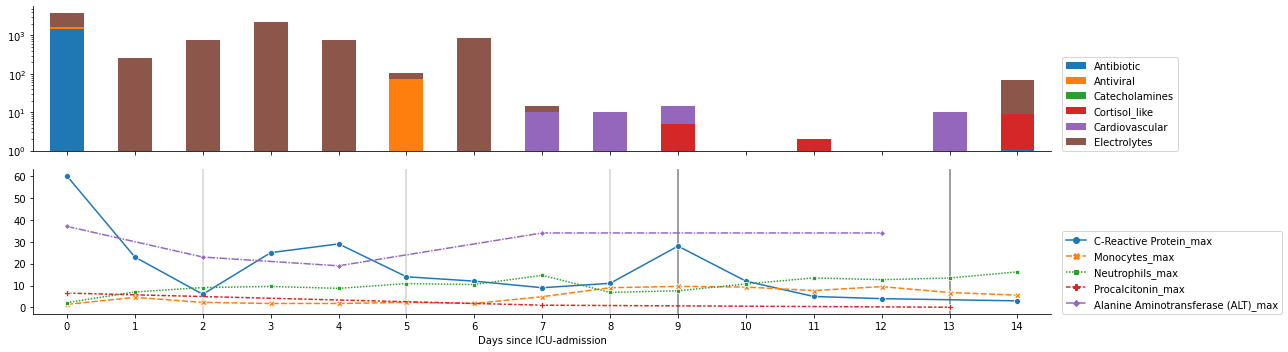

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(18, 5), sharex=True, layout='constrained')
ax[0].set_xlim(0,14)
ax[0].set_xticks(range(0,15))
plt.axvline(2, color='lightgrey') # cultures negative
plt.axvline(5, color='lightgrey') # cultures negative
plt.axvline(8, color='lightgrey') # cultures negative
plt.axvline(9, color='grey') # sputum culture Acinetobacter baumanii
plt.axvline(13, color='grey') # sputum culture G+ cocci
ax[1].set_xlabel("Days since ICU-admission")
g = sns.lineplot(data=cand_frame[["C-Reactive Protein_max", "Monocytes_max", "Neutrophils_max", "Procalcitonin_max", "Alanine Aminotransferase (ALT)_max"]], markers=True)
g_2 = cand_frame[["Antibiotic", "Antiviral", "Catecholamines", "Cortisol_like", "Cardiovascular", "Electrolytes"]].plot.bar(stacked=True, ax=ax[0])
g_2.set_yscale("log")
ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[0].legend(loc=(1.01, 0))
ax[1].legend(loc=(1.01, 0))
plt.tight_layout()
plt.show()
plt.savefig("./fig2_single_patient_lineplot.png") 